<a href="https://colab.research.google.com/github/MorganGautherot/Machine_Learning_Courses/blob/master/Random_Forest_%26_boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Les arbres de décisions

Les arbres de décision sont des algorithmes d'apprentissage automatique polyvalents qui peuvent effectuer des tâches de classification et de régression, et même des tâches à sorties multiples. Ils sont capables d'adapter des ensembles de données complexes.

## Importation des packages

In [3]:
# Importation of the data for our classification example
from sklearn.datasets import load_iris

# Importation of the data for our regression example
from sklearn.datasets import fetch_california_housing

# Importation of the decision tree algorithm for regression
from sklearn.tree import DecisionTreeRegressor

# Importation of the decision tree algorithom for classification
from sklearn.tree import DecisionTreeClassifier

# Importation of tree which contain lot of functions for ou decision tree
from sklearn import tree

# import the package graphiz to visualize your trees
import graphviz

# Importation of the train_test_split function which split randomly our data
# into a train and test set
from sklearn.model_selection import train_test_split

# Importation of the maplotlib package to create graphics
import matplotlib.pyplot as plt

# Importation of numpy to use of vectors, matrices, tensors.
import numpy as np

## Arbres de classification

Pour comprendre les arbres de décision, construisons-en un et voyons comment il fait des prédictions.

### Importation des données

In [4]:
# Data frame for our classification example
iris = load_iris()
X_clas = iris.data[:, ]
y_clas = iris.target

X_train_clas, X_test_clas, y_train_clas, y_test_clas = train_test_split(X_clas,
                                                                        y_clas,
                                                                        test_size=0.10,
                                                                        random_state=123)

### Exercice 1 - Initialisation

Vous allez initialiser votre premier modèle d'arbre de décision pour un problème de classification.

Initialisez l'algorithme d'apprentissage de manière à ce qu'il crée un arbre présentant les caractéristiques suivantes :
- Il aura une profondeur maximale de 3,
- Il aura un maximum de 4 feuilles,
- Il aura comme seed la valeur 123,
- Un minimum de 10 exemples sera nécessaire pour créer une feuille.


N'hésitez pas à utiliser la [documentation de sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), toutes les réponses s'y trouvent.

In [5]:
# Initialize your model
decision_tree = DecisionTreeClassifier(max_depth=3,
                                       max_leaf_nodes=4,
                                       random_state=123,
                                       min_samples_leaf=10)

### Exercice 2 - L'entraînement

Maintenant que votre algorithme est initialisé, vous pouvez l'utiliser pour entraîner votre modèle avec le jeu de données train.

N'hésitez pas à utiliser la [documentation de sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), toutes les réponses s'y trouvent.

In [6]:
# Train your model
decision_tree.fit(X_train_clas, y_train_clas)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4, min_samples_leaf=10,
                       random_state=123)

### Exercice 3 - Valider le modèle

Maintenant que votre modèle est entraîné, il est temps de tester ses performances sur les données d'entraînement et de test.

N'hésitez pas à utiliser la [documentation de sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), toutes les réponses s'y trouvent.

In [7]:
# Predict the answer for you training dataset
y_pred_train_class = decision_tree.predict(X_train_clas)

# Predict the answer for you testing dataset
y_pred_test_class = decision_tree.predict(X_test_clas)

### Exercie 4 - Visualisez votre arbre

Maintenant que votre modèle est formé, il est temps de le visualiser.

Complétez les paramètres :
- feature_names,
- class_names,
- filled,
- rounded.

N'hésitez pas à utiliser la [documentation de sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html), toutes les réponses s'y trouvent.

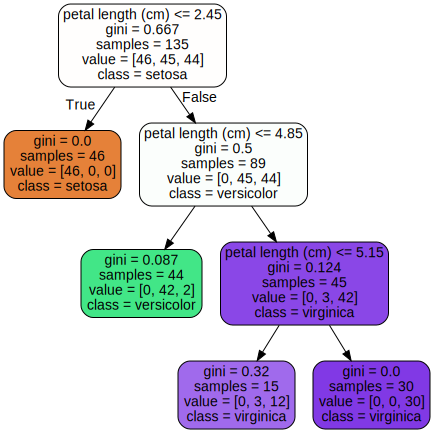

In [8]:
# Use export_graphiz to export your model in graphviz.
dot_data = tree.export_graphviz(decision_tree,
                                feature_names=iris.feature_names,
                                class_names=iris.target_names,
                                filled=True,
                                rounded=True)

graph = graphviz.Source(dot_data)

graph

Voyons comment l'arbre représenté dans la figure ci-dessus fait des prédictions. Supposons que vous trouviez une fleur d'iris et que vous souhaitiez la classer. Vous commencez par le nœud racine (profondeur 0, en haut) : ce nœud demande si la longueur des pétales de la fleur est inférieure à 2,45 cm. Si c'est le cas, vous descendez jusqu'au nœud enfant gauche de la racine (profondeur 1, à gauche). Dans ce cas, il s'agit d'un nœud feuille (c'est-à-dire qu'il n'a pas de nœuds enfants), qui ne pose donc aucune question : vous pouvez simplement regarder la classe prédite pour ce nœud et l'arbre de décision prédit que votre fleur est un Iris-Setosa (class=setosa).

Supposons maintenant que vous trouviez une autre fleur, mais que cette fois la longueur des pétales soit supérieure à 2,45 cm. Vous devez descendre jusqu'au nœud enfant droit de la racine (profondeur 1, droite), qui n'est pas un nœud feuille, et qui pose donc une autre question : la longueur des pétales est-elle inférieure à 4,85 cm ? Si c'est le cas, votre fleur est très probablement un Iris-Versicolor (profondeur 2, gauche). Si ce n'est pas le cas, il s'agit probablement d'un Iris-Virginica (profondeur 2, à droite). C'est aussi simple que cela.

### Decision boundary

Vous pouvez voir ci-dessous comment visualiser les limites de décision de notre arbre en fonction des variables.

<ipython-input-9-25d3a5b153a3>:37: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-9-25d3a5b153a3>:37: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-9-25d3a5b153a3>:37: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-9-25d3a5b153a3>:37: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-9-25d3a5b153a3>:37: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-i

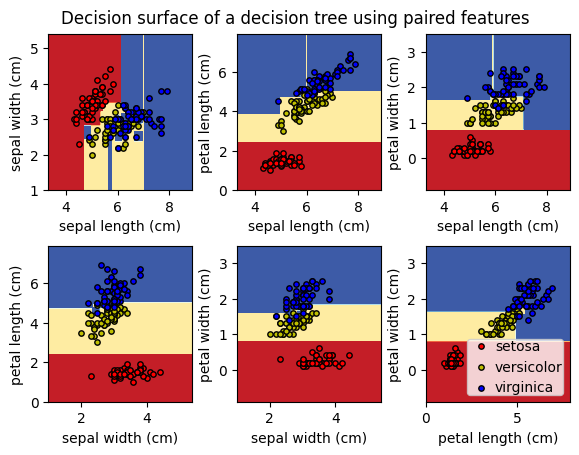

In [9]:
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

## Arbres de régression

### Importation des données

In [10]:
# Data frame for ou regression example
boston = fetch_california_housing()
X_reg = boston.data[:, ]
y_reg = boston.target

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg,
                                                                    test_size=0.10,
                                                                    random_state=123)

### Exercice 1 - Initialisation

Vous allez initialiser votre premier modèle d'arbre de décision pour un problème de classification.

Initialisez l'algorithme d'apprentissage de façon à ce qu'il crée un arbre avec les caractéristiques suivantes :
- Il aura une profondeur maximale de 3,
- Il aura un maximum de 6 feuilles,
- Il aura comme seed la valeur 123,
- Un minimum de 30 exemples sera nécessaire pour créer une feuille.


N'hésitez pas à utiliser la [documentation de sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), toutes les réponses s'y trouvent.

In [11]:
# Initialize your model
decision_tree_reg = DecisionTreeRegressor(max_depth=3,
                                         max_leaf_nodes=6,
                                         random_state=123,
                                         min_samples_leaf=30)

### Exercice 2 - L'entraînement

Maintenant que votre algorithme est initialisé, vous pouvez l'utiliser pour entraîner votre modèle avec le jeu de données train.


N'hésitez pas à utiliser la [documentation de sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), toutes les réponses s'y trouvent.

In [12]:
# Train your model
decision_tree_reg.fit(X_train_reg, y_train_reg)

DecisionTreeRegressor(max_depth=3, max_leaf_nodes=6, min_samples_leaf=30,
                      random_state=123)

### Exercice 3 - Validation du modèle

Maintenant que votre modèle s'entraîne, il est temps de tester ses performances sur les données d'entraînement et de test.

N'hésitez pas à utiliser la [documentation de sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), toutes les réponses s'y trouvent.

In [13]:
# Predict the answer for you training dataset
y_pred_train_reg = decision_tree_reg.predict(X_train_reg)

# Predict the answer for you testing dataset
y_pred_test_reg = decision_tree_reg.predict(X_test_reg)

### Exercie 4 - Visualisation de l'arbre

Maintenant que votre modèle est entraîné, il est temps de le visualiser.

Complétez les paramètres :
- feature_names,
- filled,
- rounded.

N'hésitez pas à utiliser la [documentation de sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html), toutes les réponses s'y trouvent.

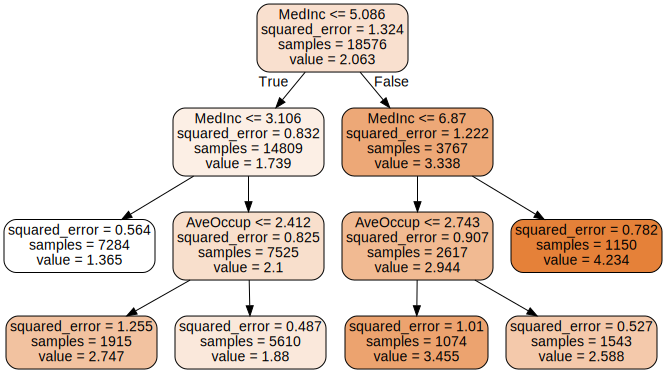

In [19]:
# Use export_graphiz to export your model in graphviz.
dot_data = tree.export_graphviz(decision_tree_reg,
                                feature_names=boston.feature_names,
                                filled=True,
                                rounded=True)

graph = graphviz.Source(dot_data)

graph